In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [10]:
from qiskit import IBMQ
from qiskit_rng import Generator

IBMQ.load_account()
rng_provider = IBMQ.get_provider(hub='ibm-q-research', group='inter-inst-phys-1', project='main')

rng_provider = IBMQ.get_provider(hub='ibm-q-research')
backend = rng_provider.backends.ibmq_jakarta

# rng_provider = IBMQ.get_provider(hub='MY_HUB', group='MY_GROUP', project='MY_PROJECT')
# backend = rng_provider.backends.ibmq_ourence

generator = Generator(backend=backend)
output = generator.sample(num_raw_bits=1024).block_until_ready()
print(output.mermin_correlator)

ibmqfactory.load_account:WARNING:2021-06-12 19:05:49,133: Credentials are already in use. The existing account in the session will be replaced.
<ipython-input-10-fc7b22156010>:8: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  backend = rng_provider.backends.ibmq_jakarta


4.0


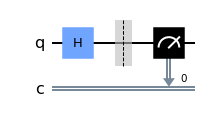

In [3]:
n = 1
qc = QuantumCircuit(n,n)
qc.h(range(n))
qc.barrier()
qc.measure(range(n),range(n))
qc.draw()

In [16]:
n = 1
def qrng(n,string):
    res = {}
    for i in range(string):
        qc = QuantumCircuit(n,n)
        qc.h(range(n))
        qc.barrier()
        qc.measure(range(n),range(n))
        shots = 1
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend, shots=shots).result().get_counts()
        res[i] = int(list(result.keys())[0])
    return res
bins = qrng(1,10)
bins.values()

dict_values([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [15]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.get_provider(hub='ibm-q-research', group='inter-inst-phys-1', project='main')
provider.backends()

def qrng_real(n,string):
    res = {}
    for i in range(string):
        qc = QuantumCircuit(n,n)
        qc.h(range(n))
        qc.barrier()
        qc.measure(range(n),range(n))
        shots = 1
        backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
        job = execute(qc,backend, shots = 1)
        result = job.result().get_counts()
        print(result)
        res[i] = int(list(result.keys())[0])
    return res
       
bins = qrng_real(1,2)
bins.values()


{'1': 1}
{'0': 1}


dict_values([1, 0])

# Gerando números aleatórios inteiros

In [32]:
def qrng_int(n,string):
    res = {}
    for i in range(string):
        qc = QuantumCircuit(n,n) #n qubits  e n classical bits
        qc.h(range(n)) # todos os qubits em superposição
        qc.barrier()
        qc.measure(range(n),range(n)) #medindo os n qubits e guardando o resultado da medida nos bits classicos
        
        shots = 1
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend, shots=shots).result().get_counts()
        res[i] = int(list(result.keys())[0],2) #guardando estado medido e convertendo em binário
    return res

n = 4 #numero de qubits
size = 100 #quantidade de numeros gerados
ints = qrng_int(n,size)
ints.values()

dict_values([13, 14, 1, 10, 4, 15, 3, 1, 6, 6, 13, 1, 1, 2, 9, 1, 15, 5, 0, 5, 9, 7, 6, 5, 5, 9, 9, 11, 6, 3, 6, 5, 5, 6, 12, 14, 0, 8, 9, 13, 7, 8, 0, 12, 11, 7, 11, 9, 7, 5, 7, 1, 2, 3, 12, 13, 1, 7, 7, 14, 13, 11, 1, 10, 1, 15, 13, 8, 5, 14, 6, 6, 2, 9, 3, 9, 2, 2, 15, 5, 7, 4, 12, 8, 5, 14, 8, 14, 10, 3, 7, 0, 13, 12, 15, 1, 12, 10, 2, 11])

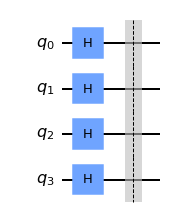

In [40]:
n = 4
qc = QuantumCircuit(n)
qc.h(range(n))
qc.barrier()
# qc.measure(range(n),range(n))
display(qc.draw())

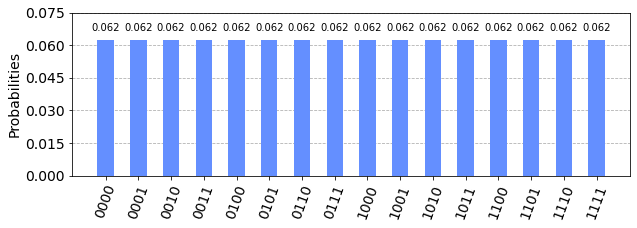

0

In [43]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_counts()
display(plot_histogram(result,figsize= (10,3)))